## Problem Statement - Part I:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Step 1: Data Understanding and Exploration

In [1588]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1589]:
#reading the dataset
house=pd.read_csv('train.csv')

In [1590]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1591]:
house.shape

(1460, 81)

In [1592]:
#summary of the dataset : 1460 rows, columns: 81
#The dataset comprises categorical as well as numerical values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1593]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [1594]:
#Columns of the dataset
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1595]:
#finding out the total missing values in the dataset
pd.options.display.max_rows=100
print(house.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Step 2: Data Cleaning

In [1596]:
#removing columns such as 'id' which are not required 
house.drop(['Id'],axis=1,inplace=True)

In [1597]:
house.shape

(1460, 80)

In [1598]:
print(round(100*(house.isnull().sum()/len(house)),2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [1599]:
# Dropping Columns with more than 10 % missing values
missing_values=house.isnull().sum()/len(house)
missing_features=missing_values[missing_values>0.1].index
print('Dropping the features which exceed threshold of 10% :')
print(missing_features)
house.drop(missing_features, axis=1, inplace=True)

Dropping the features which exceed threshold of 10% :
Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [1600]:
print(round(100*(house.isnull().sum()/len(house)),2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [1601]:
#Analyzing those features which still have missing values:

print(house['MasVnrType'].describe(),'\n')
print(house['MasVnrArea'].describe(),'\n')
print(house['BsmtQual'].describe(),'\n')
print(house['BsmtCond'].describe(),'\n')
print(house['BsmtExposure'].describe(),'\n')
print(house['BsmtFinType1'].describe(),'\n')
print(house['Electrical'].describe(),'\n')
print(house['GarageType'].describe(),'\n')
print(house['GarageYrBlt'].describe(),'\n')
print(house['GarageFinish'].describe(),'\n')
print(house['GarageQual'].describe(),'\n')
print(house['GarageCond'].describe(),'\n')

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object 

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object 

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object 

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object 

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object 

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
7

In [1602]:
# Dropping rows which have NaN values as there will be enough data for analysis even after removing these
house.dropna(axis='rows', inplace=True)

print(house.shape)
print(round(100*(house.isnull().sum()/len(house)),2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

In [1603]:
#verifying if any null values are existing in the dataset
print(house.isna().any())

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea  

In [1604]:
#Deriving features from existing features
#Calculating the days from features - YearBuilt,YearRemodAdd,GarageYrBlt,YrSold and storing in new variables

house['Age_YearBuilt'] = pd.datetime.now().year-house['YearBuilt']
house['Age_YearRemodAdd'] = pd.datetime.now().year-house['YearRemodAdd']
house['Age_GarageYrBlt'] = pd.datetime.now().year-house['GarageYrBlt']
house['Age_YrSold_Old'] = pd.datetime.now().year-house['YrSold']

In [1605]:
#Dropping the Actual 'Year' columns
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [1606]:
house.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0    Inside       Gtl      CollgCr  ...        0       0      2       WD   
1       FR2       Gtl      Veenker  ...        0       0      5       WD   
2    Inside       Gtl      CollgCr  ...        0       0      9       WD   
3    Corner       Gtl      Crawfor  ...        0       0      2       WD   
4       FR2       Gtl      NoRidge  ...        0       0     12       WD   

   SaleCondition  SalePrice Age_YearBuilt Age_YearRemodAdd Age_GarageYrBlt  \
0         Normal     208500            17               17            17.0   
1         Normal     181500            44               44            44.0   
2         Normal     223500            19               18            19.0   
3        Abnorml     140000           105               50            22.0   
4         Normal     250000            20               20            20.0   

  Age_YrSold_Old  
0             12  
1             13  
2             12  
3             14  
4             12  

[5 rows x 74 columns]

In [1607]:
house.shape

(1338, 74)

### Step 3. Data Visualization &  Data Preparation

In [1608]:
#Separating numerical and categorical features
print('NUMERICAL FEATURES:')
numeric=house.select_dtypes(include=['float64', 'int64']).columns
print(numeric)

print('\n','CATEGORICAL FEATURES:')
categorical=house.select_dtypes('object').columns

for column in categorical:
    print(column,' : ',house[column].unique())
    
print(len(numeric))
print(len(categorical))

NUMERICAL FEATURES:
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_YearBuilt', 'Age_YearRemodAdd',
       'Age_GarageYrBlt', 'Age_YrSold_Old'],
      dtype='object')

 CATEGORICAL FEATURES:
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWA

Observations:

1. There are 1338 rows and 74 columns in the 'house' dataframe after cleaning.
2. There are 36 numeric columns, 38 categorical columns.

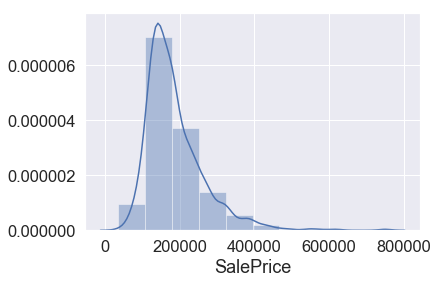

In [1609]:
#Visualizing the target variable - 'Sales Price'
sns.distplot(house['SalePrice'],bins=10)

In [1610]:
#Checking the statistic details of target variable
print(round(house['SalePrice'].describe()),2)

count      1338.0
mean     186762.0
std       78914.0
min       35311.0
25%      135000.0
50%      168500.0
75%      220000.0
max      755000.0
Name: SalePrice, dtype: float64 2


Observations:
    1. The Sales Price of the houses ranges between USD 35311 and USD 755000
    2. The average Sales Price of the houses is around USD 186762

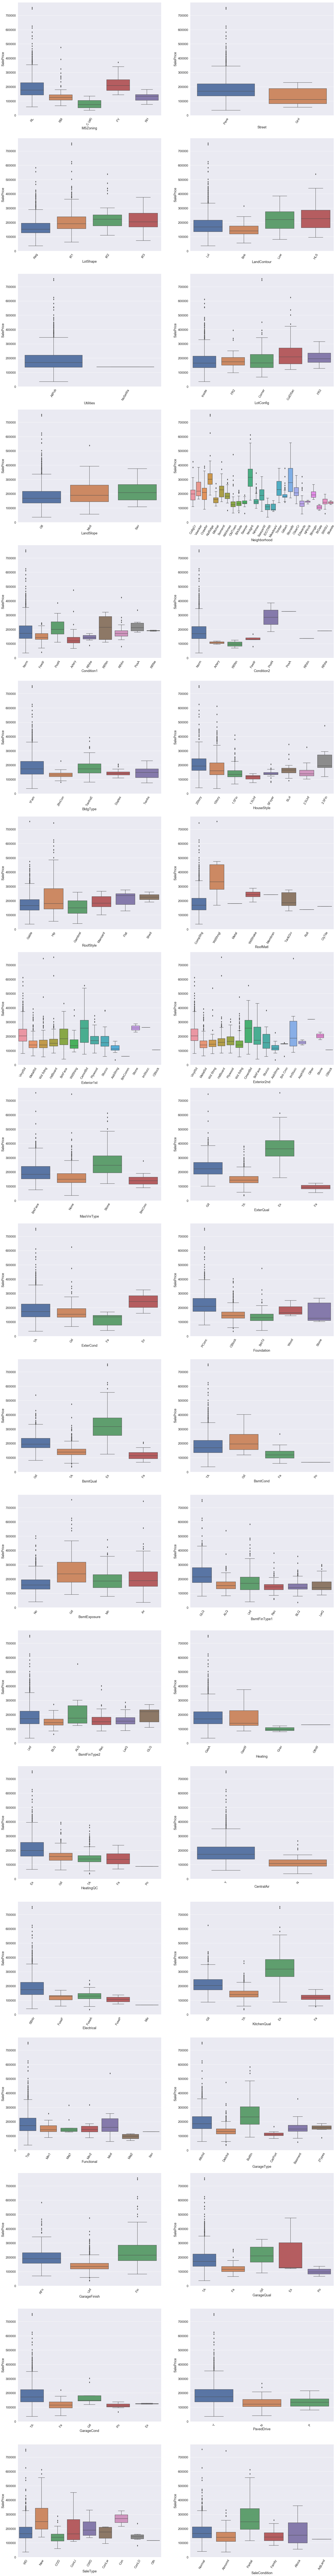

In [1611]:
#Visualizing categorical data
plt.figure(figsize=(30,500))
for i,col in enumerate(categorical,1):
    plt.subplot(len(categorical),2,i)
    plt.xticks(rotation='60')
    sns.boxplot(x=col,y='SalePrice',data=house)

<Figure size 432x288 with 0 Axes>

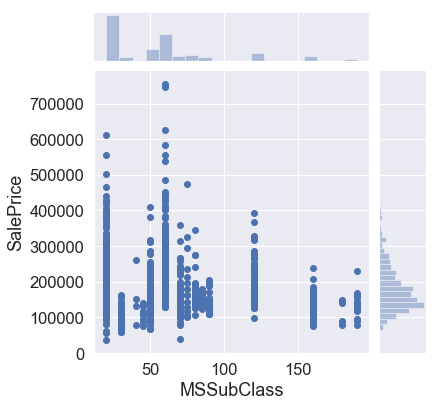

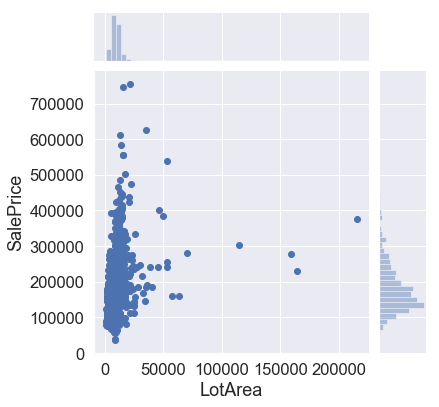

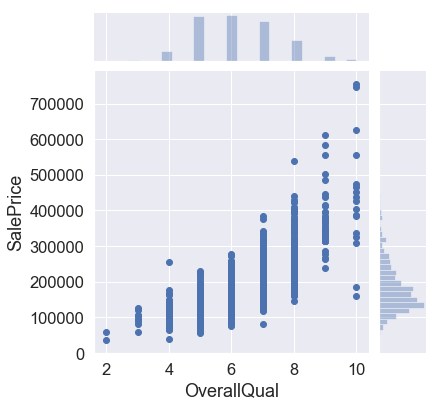

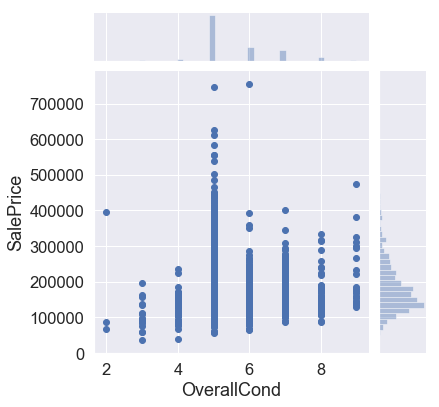

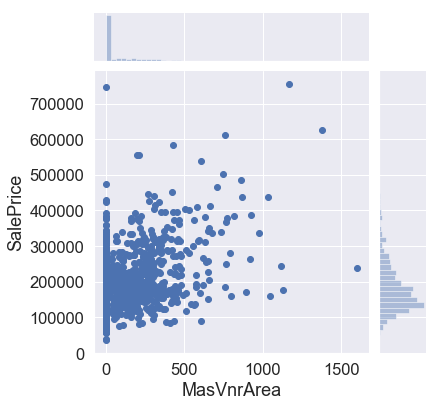

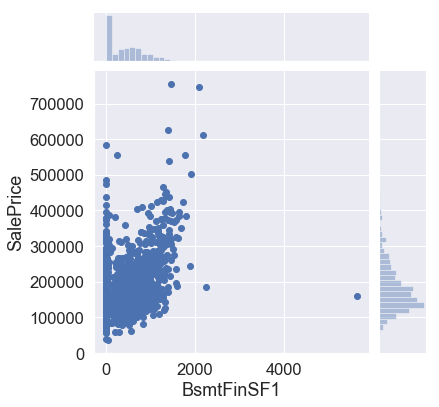

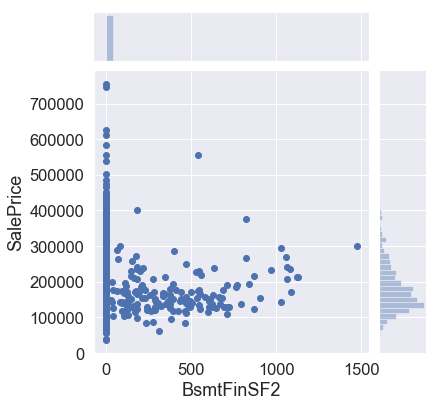

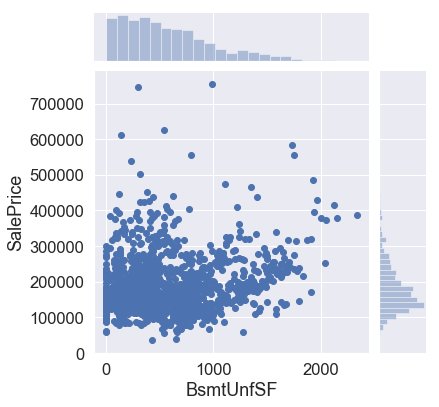

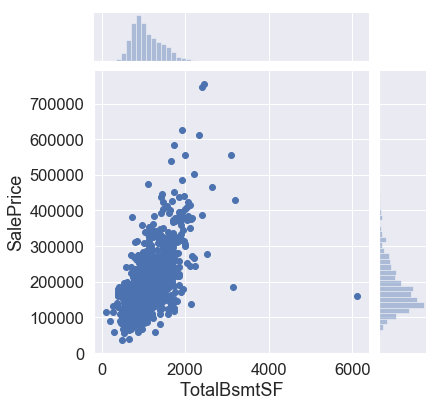

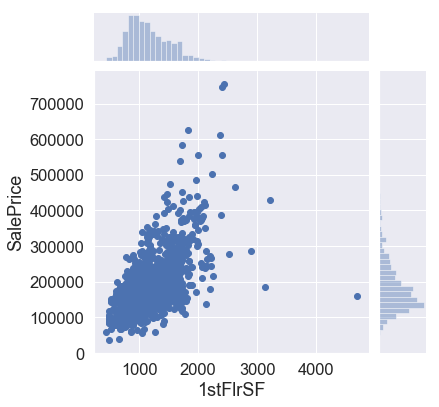

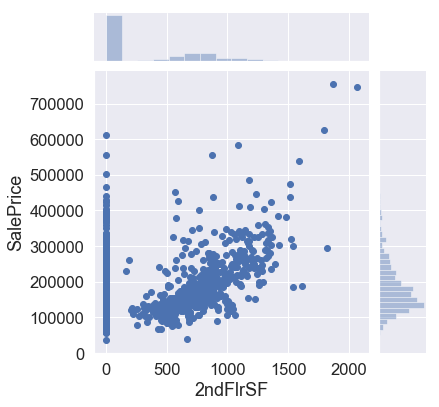

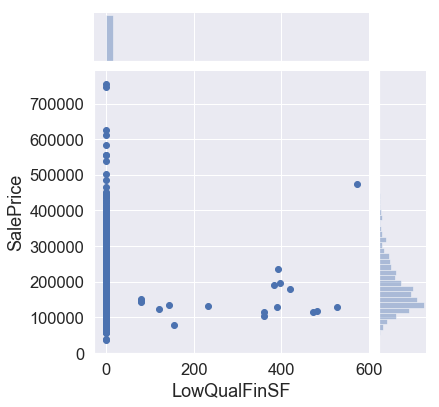

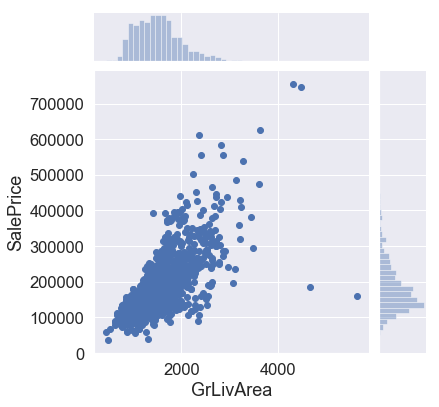

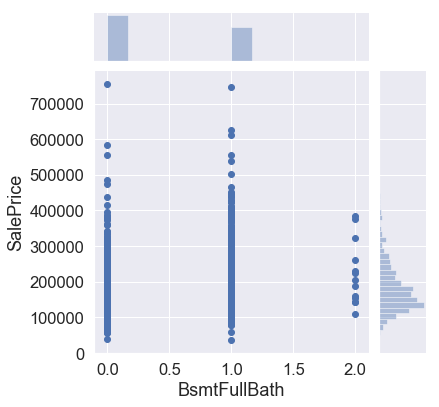

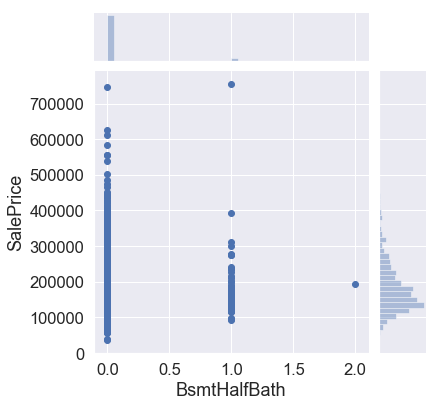

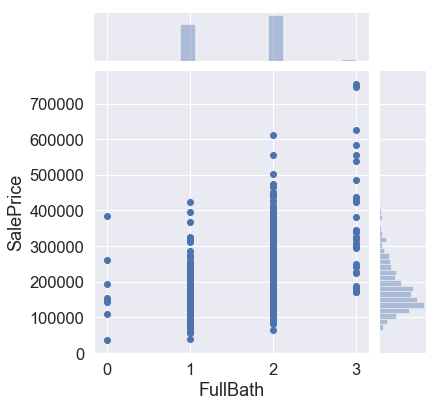

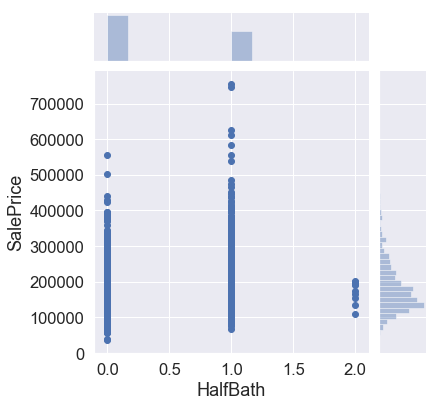

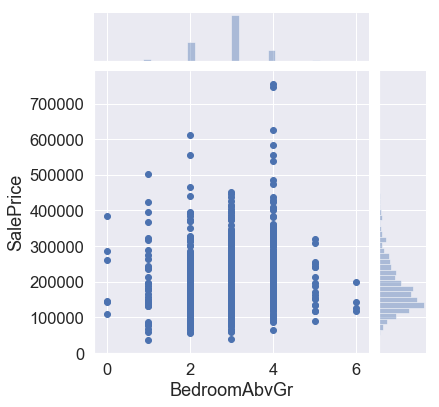

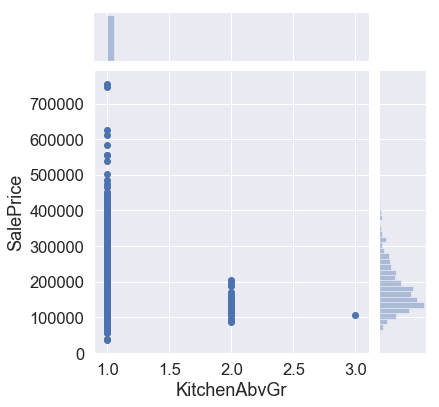

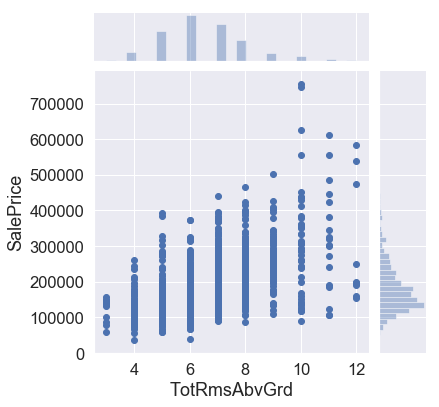

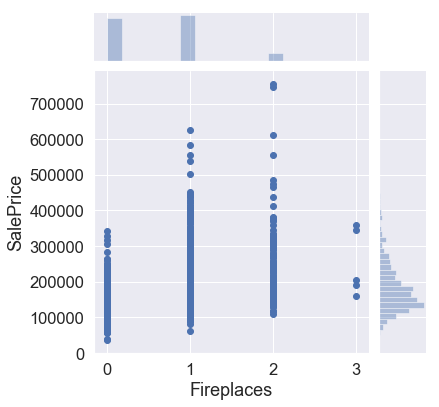

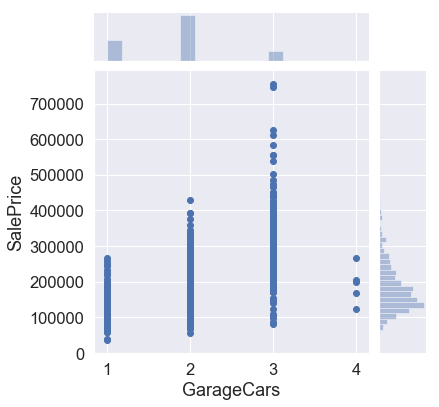

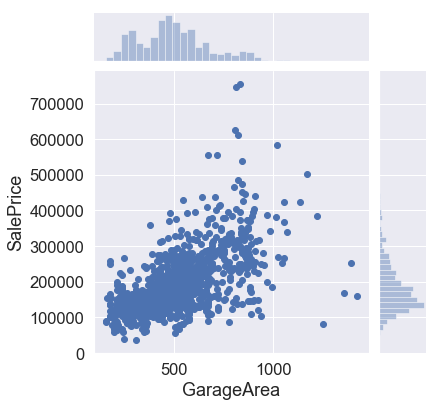

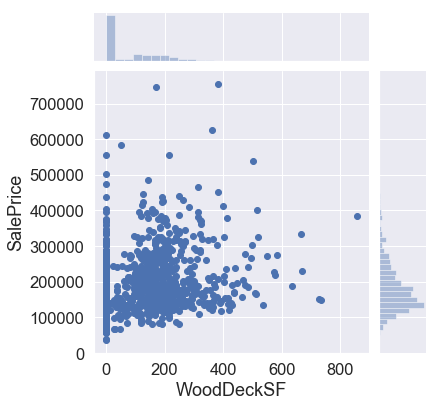

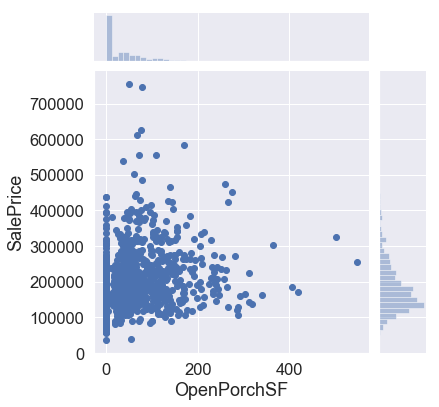

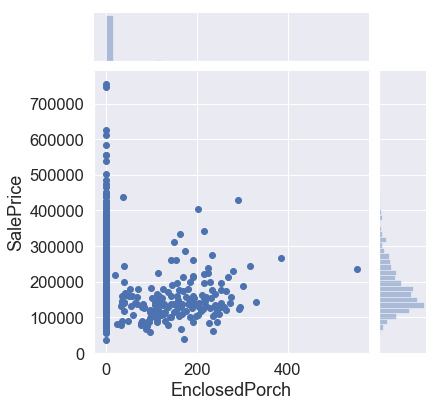

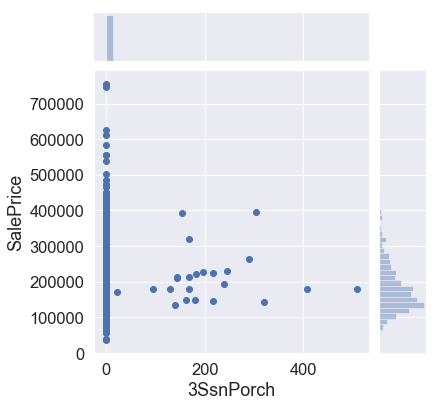

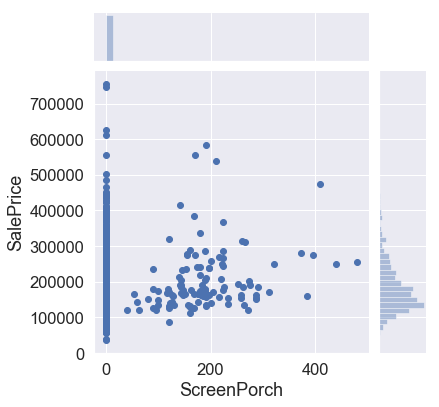

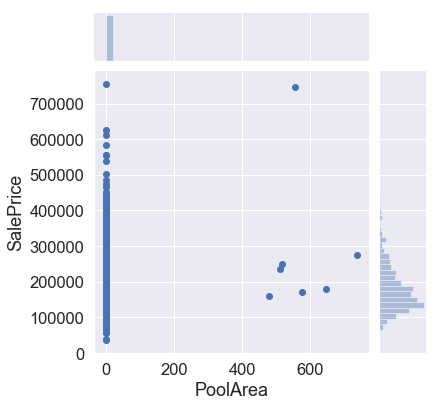

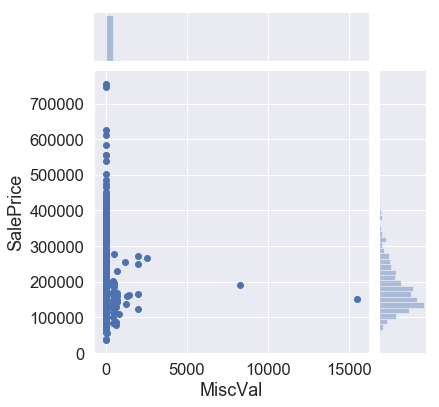

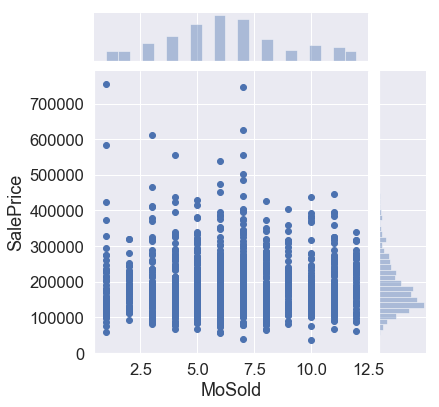

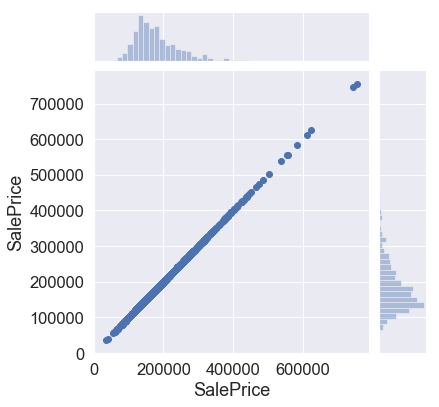

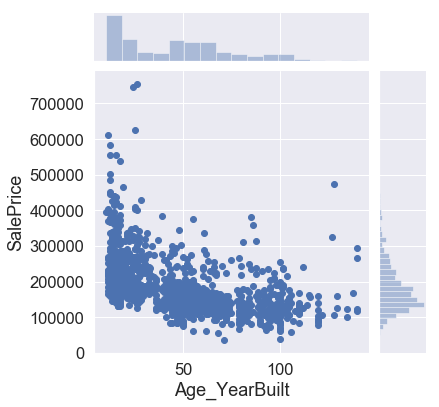

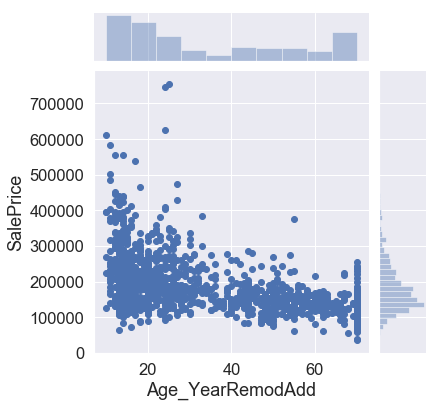

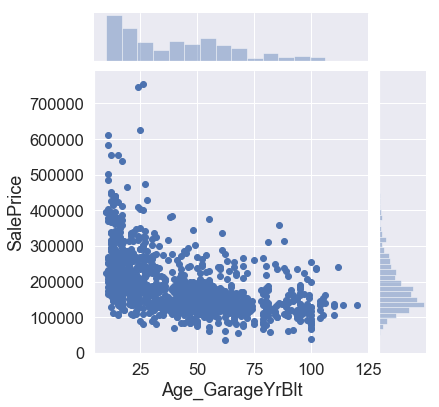

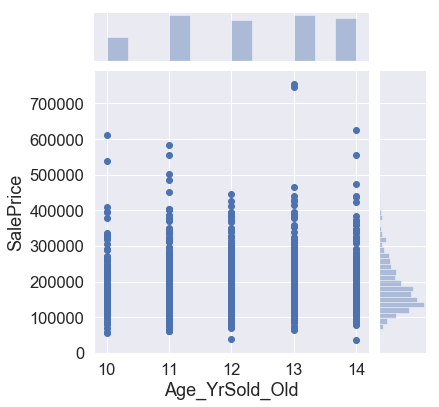

In [1612]:
#Visualizing numeric data using jointplot
for i,col in enumerate(numeric):
    plt.figure(i)
    sns.jointplot(x=house[col],y=house['SalePrice'])

In [1613]:
#To get a clearer idea of which variables are significant in predicting the price of a house, we will look at the correlation 

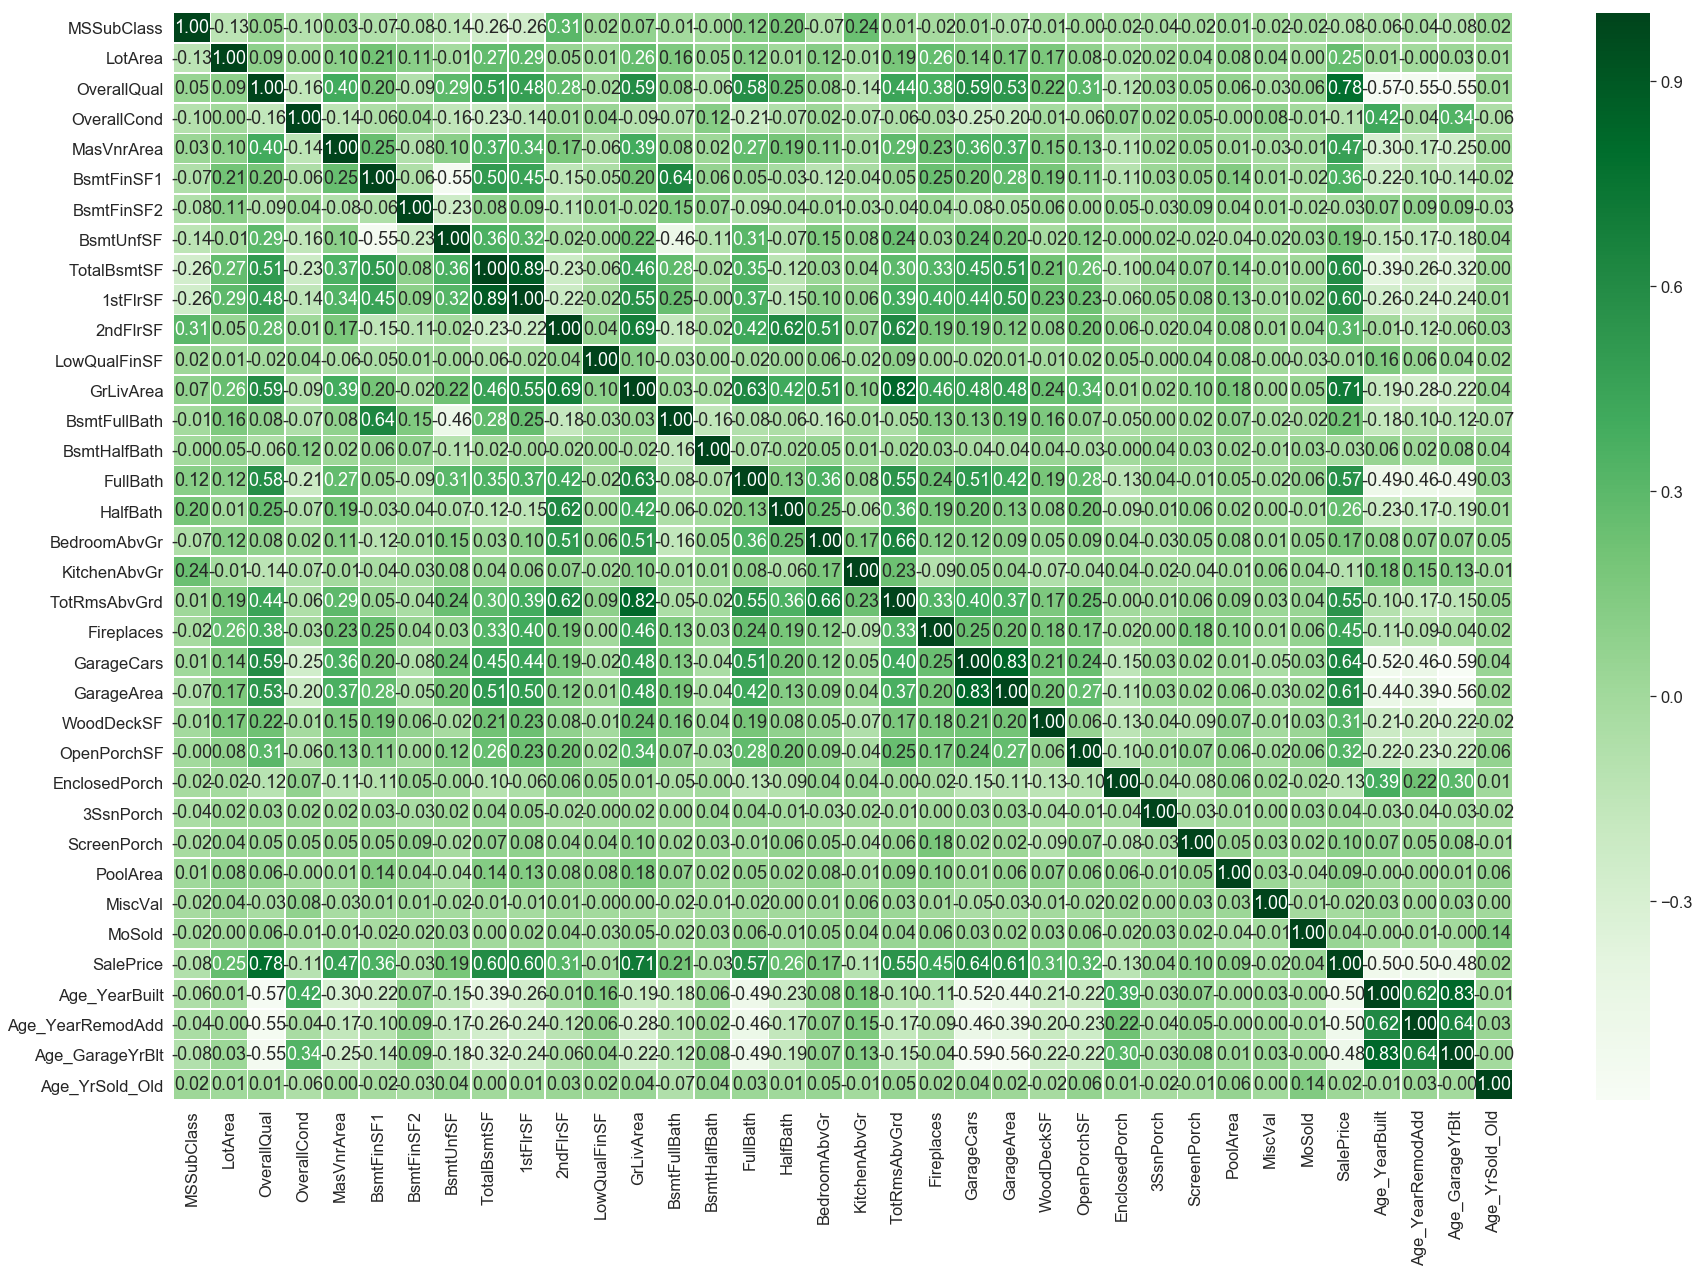

In [1614]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
sns.heatmap(house.corr(),annot=True,cmap="Greens",linewidths=.5,fmt='.2f')

Observations:

1. The variables such as OverQual, GrLivArea, GarageCars,GarageArea,TotalBsmtSf,1stFlrSF, etc. hold a strong correlation with the target variable - SalePrice


In [1615]:
#Using Dummy Variables to convert categorical variables to numeric :

for col in categorical:
    #Dropping first column to ensure multicollinearity 
    dummy_var=pd.get_dummies(house[col],drop_first=True)
    
    #Adding prefix to dummy column names
    dummy_var=dummy_var.add_prefix(f'{col}_')
    
    #Adding the results to the original dataframe
    house=pd.concat([house,dummy_var],axis=1)
    
    #Drop original categorical column as we have created the dummies for it
    house.drop([col],axis=1,inplace = True)

house.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 227 columns]

In [1616]:
#Removing outliers if their z-score value is >3 or <-3 
from scipy import stats
z = np.abs(stats.zscore(house[numeric]))

retained = house[numeric][(z<3).all(axis=1)]
house = house.loc[retained.index]
house

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0             60     8450            7            5       196.0         706   
2             60    11250            7            5       162.0         486   
4             60    14260            8            5       350.0         655   
6             20    10084            8            5       186.0        1369   
10            20    11200            5            5         0.0         906   
11            60    11924            9            5       286.0         998   
12            20    12968            5            6         0.0         737   
13            20    10652            7            5       306.0           0   
14            20    10920            6            5       212.0         733   
15            45     6120            7            8         0.0           0   
16            20    11241            6            7       180.0         578   
18            20    13695            5            5         0.0         646   
19            20     7560            5            6         0.0         504   
20            60    14215            8            5       380.0           0   
22            20     9742            8            5       281.0           0   
23           120     4224            5            7         0.0         840   
25            20    14230            8            5       640.0           0   
27            20    11478            8            5       200.0        1218   
29            30     6324            4            6         0.0           0   
30            70     8500            4            4         0.0           0   
31            20     8544            5            6         0.0           0   
32            20    11049            8            5         0.0           0   
34           120     7313            9            5       246.0        1153   
35            60    13418            8            5       132.0           0   
36            20    10859            5            5         0.0           0   
38            20     7922            5            7         0.0         731   
40            20     8658            6            5       101.0         643   
42            85     9180            5            7         0.0         747   
43            20     9200            5            6         0.0         280   
44            20     7945            5            6         0.0         179   
45           120     7658            9            5       412.0         456   
47            20    11096            8            5         0.0          24   
49            20     7742            5            7         0.0         763   
54            80     7134            5            5         0.0         384   
56           160     2645            8            5       456.0         649   
57            60    11645            7            5         0.0           0   
59            20     7200            5            7         0.0         632   
60            20    13072            6            5         0.0         941   
61            75     7200            5            7         0.0           0   
62           120     6442            8            5       178.0          24   
63            70    10300            7            6         0.0           0   
65            60     9591            8            5       344.0           0   
66            20    19900            7            5       287.0         912   
67            20    10665            7            5       167.0        1013   
68            30     4608            4            6         0.0           0   
69            50    15593            7            4         0.0         603   
71            20     7599            4            6         0.0         565   
73            20    10200            5            7       104.0         320   
76            20     8475            4            7         0.0         228   
77            50     8635            5            5     

### Step 4. Model Building and Evaluation 

In [1617]:
#Defining X & y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

In [1618]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1619]:
# # scaling the features
# from sklearn.preprocessing import scale

# # storing column names in cols, since column names are (annoyingly) lost after 
# # scaling (the df is converted to a numpy array)
# cols = X.columns
# X = pd.DataFrame(scale(X))
# X.columns = cols
# X.columns

In [1620]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=1)

## 1. Ridge Regression

In [1621]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1622]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
24         100     -10459.291193    -14215.060042                1
23          50     -10009.474003    -14233.718485                2
22          20      -9622.156753    -14438.594067                3
21          10      -9441.132031    -14665.635969                4
20           9      -9421.663027    -14702.519887                5
19           8      -9401.904630    -14748.107086                6
18           7      -9381.201671    -14802.224077                7
17           6      -9360.433871    -14867.203851                8
16           5      -9339.767473    -14940.962390                9
15           4      -9318.761076    -15024.666056               10
25         500     -12787.592627    -15124.996872               11
14           3      -9299.353885    -15126.823565               12
13           2      -9281.030151    -15258.553575               13
12           1      -9264.772844    -15427.671494               14
11         0.9      -9263.230394    -15448.220603               15
10         0.8      -9261.573294    -15470.071556               16
9          0.7      -9259.818081    -15492.982651               17
8          0.6      -9258.059334    -15517.373138               18
7          0.5      -9256.408943    -15544.249581               19
6          0.4      -9255.215113    -15573.524195               20
5          0.3      -9254.155992    -15605.652227               21
4          0.2      -9253.211325    -15640.192319               22
3          0.1      -9252.221811    -15678.239983               23
2         0.01      -9251.375881    -15724.321655               24
1        0.001      -9251.316170    -15730.150213               25
0       0.0001      -9251.309989    -15730.744675               26

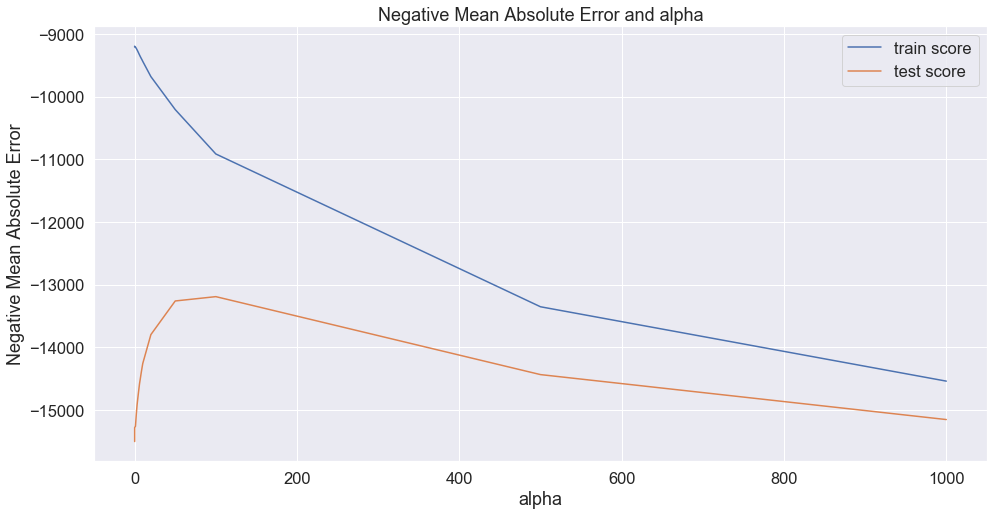

In [1623]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1624]:
# get the best estimator for lambda
model_cv.best_estimator_

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [1625]:
alpha = 6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9378347997484379
0.9238036839338366


In [1626]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0               MSSubClass    -151.7674
1                  LotArea       1.4039
2              OverallQual    8880.9302
3              OverallCond    6188.8576
4               MasVnrArea      16.0777
5               BsmtFinSF1      16.1853
6               BsmtFinSF2      11.6549
7                BsmtUnfSF      -0.2361
8              TotalBsmtSF      27.6041
9                 1stFlrSF      30.1977
10                2ndFlrSF      50.9946
11            LowQualFinSF     -73.1239
12               GrLivArea       8.0684
13            BsmtFullBath    2642.9611
14            BsmtHalfBath       0.0000
15                FullBath     445.4168
16                HalfBath    -433.9535
17            BedroomAbvGr   -4532.6525
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1509.0177
20              Fireplaces    1603.9850
21              GarageCars    3831.1371
22              GarageArea      12.8753
23              WoodDeckSF      16.5934
24             OpenPorchSF      33.9344
25           EnclosedPorch      23.9293
26               3SsnPorch       0.0000
27             ScreenPorch      36.0754
28                PoolArea       0.0000
29                 MiscVal      -0.8136
30                  MoSold     786.1786
31           Age_YearBuilt    -417.5391
32        Age_YearRemodAdd    -114.6463
33         Age_GarageYrBlt     104.6585
34          Age_YrSold_Old     -87.9179
35             MSZoning_FV    8959.2220
36             MSZoning_RH    4142.4210
37             MSZoning_RL    -938.7580
38             MSZoning_RM   -5105.5426
39             Street_Pave    4738.6610
40            LotShape_IR2    3511.4122
41            LotShape_IR3    -323.8353
42            LotShape_Reg    -536.6411
43         LandContour_HLS    8674.2045
44         LandContour_Low   -8486.1889
45         LandContour_Lvl    -455.0560
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac     790.5838
48           LotConfig_FR2   -4390.9361
49           LotConfig_FR3   -1120.2624
..                     ...          ...
176           Heating_Grav    -753.8590
177           Heating_OthW       0.0000
178           HeatingQC_Fa    1144.6382
179           HeatingQC_Gd   -3767.2201
180           HeatingQC_Po       0.0000
181           HeatingQC_TA   -1869.4925
182           CentralAir_Y    3027.2763
183       Electrical_FuseF    -525.2548
184       Electrical_FuseP    1077.9143
185         Electrical_Mix       0.0000
186       Electrical_SBrkr    3251.7526
187         KitchenQual_Fa   -7900.9069
188         KitchenQual_Gd  -11936.3589
189         KitchenQual_TA  -11660.5181
190        Functional_Maj2       0.0000
191        Functional_Min1   -3343.1245
192        Functional_Min2    2900.3063
193         Functional_Mod   -9715.9685
194         Functional_Sev       0.0000
195         Functional_Typ   10697.3412
196      GarageType_Attchd      93.5801
197     GarageType_Basment   -2799.9223
198     GarageType_BuiltIn     166.6427
199     GarageType_CarPort    1061.0259
200      GarageType_Detchd    1478.6736
201       GarageFinish_RFn   -1562.6818
202       GarageFinish_Unf   -1748.4136
203          GarageQual_Fa   -3308.1887
204          GarageQual_Gd    4662.3974
205          GarageQual_Po    -753.8590
206          GarageQual_TA   -1487.9359
207          GarageCond_Fa    2020.2425
208          GarageCond_Gd   -3503.1092
209          GarageCond_Po    -289.3077
210          GarageCond_TA     884.5881
211           PavedDrive_P   -1659.8909
212           PavedDrive_Y    2760.8873
213           SaleType_CWD     961.5330
214           SaleType_Con       0.0000
215         SaleType_ConLD    1272.5058
216         SaleType_ConLI   -4152.1969
217         SaleType_ConLw   -1216.0623
218           SaleType_New    3453.1972
219           SaleType_Oth       0.0000
220            SaleType_WD    -218.6581
221  SaleCondition_AdjLand    3589.5749
222   SaleCondition_Alloca   -7757.9193
223   SaleCondition_Family    5112.2383
224   SaleConditio

In [1627]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [1628]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -151.7674,
 'LotArea': 1.4039,
 'OverallQual': 8880.9302,
 'OverallCond': 6188.8576,
 'MasVnrArea': 16.0777,
 'BsmtFinSF1': 16.1853,
 'BsmtFinSF2': 11.6549,
 'BsmtUnfSF': -0.2361,
 'TotalBsmtSF': 27.6041,
 '1stFlrSF': 30.1977,
 '2ndFlrSF': 50.9946,
 'LowQualFinSF': -73.1239,
 'GrLivArea': 8.0684,
 'BsmtFullBath': 2642.9611,
 'BsmtHalfBath': 0.0,
 'FullBath': 445.4168,
 'HalfBath': -433.9535,
 'BedroomAbvGr': -4532.6525,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1509.0177,
 'Fireplaces': 1603.985,
 'GarageCars': 3831.1371,
 'GarageArea': 12.8753,
 'WoodDeckSF': 16.5934,
 'OpenPorchSF': 33.9344,
 'EnclosedPorch': 23.9293,
 '3SsnPorch': 0.0,
 'ScreenPorch': 36.0754,
 'PoolArea': 0.0,
 'MiscVal': -0.8136,
 'MoSold': 786.1786,
 'Age_YearBuilt': -417.5391,
 'Age_YearRemodAdd': -114.6463,
 'Age_GarageYrBlt': 104.6585,
 'Age_YrSold_Old': -87.9179,
 'MSZoning_FV': 8959.222,
 'MSZoning_RH': 4142.421,
 'MSZoning_RL': -938.758,
 'MSZoning_RM': -5105.5426,
 'Street_Pave': 4738.661,
 'Lo

In [1629]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
12        GarageQual_Gd         True            1    4662.3974
1   Exterior1st_CemntBd         True            1    3652.5302
3   Exterior2nd_CmentBd         True            1    3652.5302
4          ExterCond_Fa         True            1    3505.9947
10    GarageType_Detchd         True            1    1478.6736
9    GarageType_CarPort         True            1    1061.0259
8    GarageType_BuiltIn         True            1     166.6427
6     GarageType_Attchd         True            1      93.5801
5          Heating_Grav         True            1    -753.8590
13        GarageQual_Po         True            1    -753.8590
0    Exterior1st_CBlock         True            1   -1710.7886
2    Exterior2nd_CBlock         True            1   -1710.7886
7    GarageType_Basment         True            1   -2799.9223
11        GarageQual_Fa         True            1   -3308.1887
14        GarageCond_Gd         True            1   -3503.1092

Observations:

1. Ridge regression produces a complex model and has most 
of the coefficients as non-zero, thus not very effective in feature selection.

## 2. Lasso Regression 

In [1630]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1631]:
# display the mean scores
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.132123      0.016231         0.001800        0.000400      0.0001   
1       0.128525      0.013829         0.001600        0.000490       0.001   
2       0.119929      0.005546         0.001800        0.000400        0.01   
3       0.115933      0.004558         0.001399        0.000490        0.05   
4       0.121525      0.005813         0.001199        0.000399         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -15662.119379      -15862.274552      -16261.745189   
1   {'alpha': 0.001}      -15661.938351      -15857.471899      -16260.257700   
2    {'alpha': 0.01}      -15659.784610      -15762.412791      -16245.375491   
3    {'alpha': 0.05}      -15650.916809      -15756.053356      -16223.408738   
4     {'alpha': 0.1}      -15641.030306      -15747.584145      -16200.266477   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -15358.868230  ...    -15502.349831      641.886207               28   
1      -15360.375021  ...    -15499.650077      643.959503               27   
2      -15377.867922  ...    -15470.144336      648.973213               26   
3      -15387.678848  ...    -15464.697320      642.277907               25   
4      -15375.122600  ...    -15457.625698      628.932297               24   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9391.629162        -9101.736834        -8973.579793   
1        -9391.633408        -9101.732502        -8973.578769   
2        -9391.762209        -9101.747371        -8973.613368   
3        -9392.304131        -9101.915410        -8973.751423   
4        -9392.931244        -9102.021914        -8973.796792   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9381.918132        -9129.586770      -9195.690138       164.683242  
1        -9381.912772        -9129.601332      -9195.691757       164.682641  
2        -9381.856442        -9129.855653      -9195.767008       164.669144  
3        -9381.797665        -9130.912967      -9196.136319       164.644255  
4        -9381.761429        -9132.286889      -9196.559653       164.653068  

[5 rows x 21 columns]

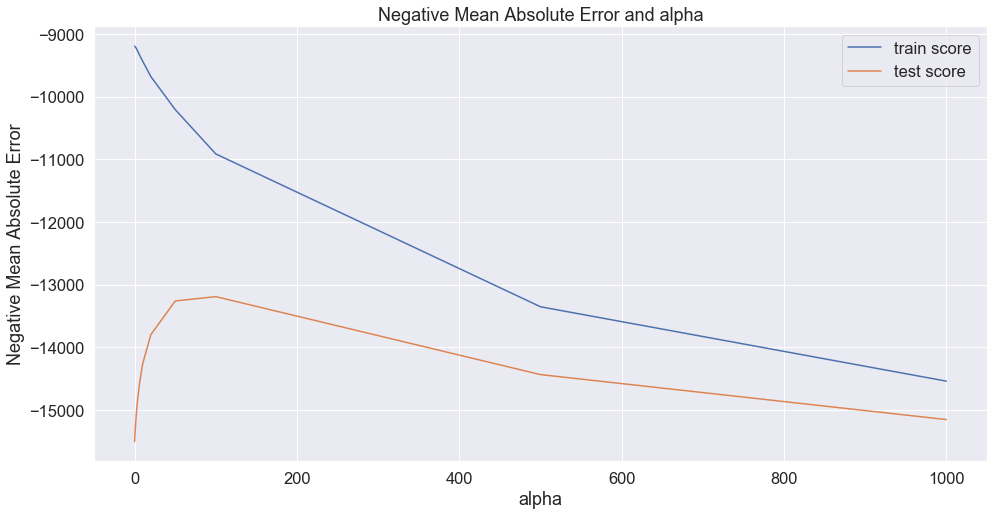

In [1632]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1633]:
model_cv.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1634]:
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9313171502145836
0.9221784798405305


In [1635]:
# Put the Features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0               MSSubClass    -131.5077
1                  LotArea       1.3553
2              OverallQual    8803.7998
3              OverallCond    6211.6390
4               MasVnrArea      13.1075
5               BsmtFinSF1      28.6806
6               BsmtFinSF2      21.4800
7                BsmtUnfSF      12.6276
8              TotalBsmtSF      13.9607
9                 1stFlrSF      28.3686
10                2ndFlrSF      42.4651
11            LowQualFinSF    -111.1306
12               GrLivArea      11.2764
13            BsmtFullBath    2511.9574
14            BsmtHalfBath       0.0000
15                FullBath       0.0000
16                HalfBath    -184.4298
17            BedroomAbvGr   -4135.3952
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1825.2534
20              Fireplaces    1304.5630
21              GarageCars    3698.0656
22              GarageArea      14.1870
23              WoodDeckSF      18.7405
24             OpenPorchSF      38.4049
25           EnclosedPorch      20.0386
26               3SsnPorch       0.0000
27             ScreenPorch      38.5265
28                PoolArea       0.0000
29                 MiscVal      -1.4009
30                  MoSold     765.8466
31           Age_YearBuilt    -466.3723
32        Age_YearRemodAdd    -113.5312
33         Age_GarageYrBlt      59.3382
34          Age_YrSold_Old    -130.9670
35             MSZoning_FV   10981.1916
36             MSZoning_RH       0.0000
37             MSZoning_RL      -0.0000
38             MSZoning_RM   -1706.3003
39             Street_Pave       0.0000
40            LotShape_IR2       0.0000
41            LotShape_IR3       0.0000
42            LotShape_Reg    -697.8286
43         LandContour_HLS    6965.5887
44         LandContour_Low   -3652.0498
45         LandContour_Lvl       0.0000
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac       0.0000
48           LotConfig_FR2    -774.9705
49           LotConfig_FR3      -0.0000
..                     ...          ...
176           Heating_Grav      -0.0000
177           Heating_OthW       0.0000
178           HeatingQC_Fa       0.0000
179           HeatingQC_Gd   -3486.9090
180           HeatingQC_Po       0.0000
181           HeatingQC_TA   -1407.2091
182           CentralAir_Y     699.8160
183       Electrical_FuseF      -0.0000
184       Electrical_FuseP       0.0000
185         Electrical_Mix       0.0000
186       Electrical_SBrkr    2336.9275
187         KitchenQual_Fa  -10105.6035
188         KitchenQual_Gd  -14740.0776
189         KitchenQual_TA  -15019.0460
190        Functional_Maj2       0.0000
191        Functional_Min1      -0.0000
192        Functional_Min2       0.0000
193         Functional_Mod   -4582.6836
194         Functional_Sev       0.0000
195         Functional_Typ   11331.9851
196      GarageType_Attchd      -0.0000
197     GarageType_Basment      -0.0000
198     GarageType_BuiltIn       0.0000
199     GarageType_CarPort       0.0000
200      GarageType_Detchd       0.0000
201       GarageFinish_RFn    -929.2854
202       GarageFinish_Unf    -406.3750
203          GarageQual_Fa      -0.0000
204          GarageQual_Gd       0.0000
205          GarageQual_Po      -0.0000
206          GarageQual_TA       0.0000
207          GarageCond_Fa      -0.0000
208          GarageCond_Gd      -0.0000
209          GarageCond_Po      -0.0000
210          GarageCond_TA       0.0000
211           PavedDrive_P      -0.0000
212           PavedDrive_Y     608.9047
213           SaleType_CWD      -0.0000
214           SaleType_Con       0.0000
215         SaleType_ConLD       0.0000
216         SaleType_ConLI      -0.0000
217         SaleType_ConLw       0.0000
218           SaleType_New       0.0000
219           SaleType_Oth       0.0000
220            SaleType_WD       0.0000
221  SaleCondition_AdjLand       0.0000
222   SaleCondition_Alloca   -5536.6647
223   SaleCondition_Family       0.0000
224   SaleConditio

In [1636]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -131.50767057142122,
 'LotArea': 1.3552785079401226,
 'OverallQual': 8803.799762021285,
 'OverallCond': 6211.638955061213,
 'MasVnrArea': 13.107536492764652,
 'BsmtFinSF1': 28.680645050032247,
 'BsmtFinSF2': 21.480027064975207,
 'BsmtUnfSF': 12.62757143758607,
 'TotalBsmtSF': 13.960679676715408,
 '1stFlrSF': 28.3685877236679,
 '2ndFlrSF': 42.465085082064014,
 'LowQualFinSF': -111.13057427719423,
 'GrLivArea': 11.276374145776893,
 'BsmtFullBath': 2511.9573901317412,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': -184.42979760422253,
 'BedroomAbvGr': -4135.395199943592,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1825.2534453618835,
 'Fireplaces': 1304.5630032088013,
 'GarageCars': 3698.065598170977,
 'GarageArea': 14.18696503374872,
 'WoodDeckSF': 18.7404543539905,
 'OpenPorchSF': 38.40487616132772,
 'EnclosedPorch': 20.038629641194934,
 '3SsnPorch': 0.0,
 'ScreenPorch': 38.52649445050163,
 'PoolArea': 0.0,
 'MiscVal': -1.4009020829135694,
 'MoSold': 765.8466322822264,
 

In [1637]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1638]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1   Exterior1st_CemntBd         True            1  3600.257157
3   Exterior2nd_CmentBd         True            1   744.073009
0    Exterior1st_CBlock         True            1    -0.000000
2    Exterior2nd_CBlock         True            1    -0.000000
4          ExterCond_Fa         True            1     0.000000
5          Heating_Grav         True            1    -0.000000
6     GarageType_Attchd         True            1    -0.000000
7    GarageType_Basment         True            1    -0.000000
8    GarageType_BuiltIn         True            1     0.000000
9    GarageType_CarPort         True            1     0.000000
10    GarageType_Detchd         True            1     0.000000
11        GarageQual_Fa         True            1    -0.000000
12        GarageQual_Gd         True            1     0.000000
13        GarageQual_Po         True            1    -0.000000
14        GarageCond_Gd         True            1    -0.000000

CONCLUSION:
    Considering Lasso Regression model as the final model due to lesser complexity: 

1. The features which are most significant in predicting the price of the house are:
   - Exterior1st_CemntBd/Exterior2nd_CemntBd: Exterior covering on house is Cemented.
   - Exterior1st_CBlock/Exterior2nd_CBlock: Exterior covering on house(if more than one material) is Cinder Block.
   - ExterCond: Evaluates the present condition of the material on the exterior is Fair
   - Heating_Grav:Type of heating is gravity furnace.
   - Garage Type: Garage location
   - Garage Quality: Garage quality
   
2. The optimal value of alpha for ridge regression=6 and lasso regression=100.
   
   
   


## Problem Statement - Part II:

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### The optimal value of alpha for ridge regression=6 and lasso regression=100.

#### 1. Ridge Regression : Double the alpha value & important predictor variables

In [1639]:
alpha = 12
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9323830023817778
0.9222877708508423


In [1640]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0               MSSubClass    -133.5181
1                  LotArea       1.4511
2              OverallQual    9470.2582
3              OverallCond    6235.0567
4               MasVnrArea      17.1087
5               BsmtFinSF1      17.0222
6               BsmtFinSF2      12.2717
7                BsmtUnfSF      -0.1303
8              TotalBsmtSF      29.1637
9                 1stFlrSF      33.3909
10                2ndFlrSF      53.6040
11            LowQualFinSF     -83.3627
12               GrLivArea       3.6322
13            BsmtFullBath    2744.8829
14            BsmtHalfBath       0.0000
15                FullBath     599.5102
16                HalfBath    -566.5087
17            BedroomAbvGr   -4630.4715
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1685.2393
20              Fireplaces    1946.0799
21              GarageCars    3302.3772
22              GarageArea      14.8581
23              WoodDeckSF      17.1595
24             OpenPorchSF      36.7510
25           EnclosedPorch      23.9395
26               3SsnPorch       0.0000
27             ScreenPorch      34.0650
28                PoolArea       0.0000
29                 MiscVal      -2.8353
30                  MoSold     788.5666
31           Age_YearBuilt    -420.4145
32        Age_YearRemodAdd    -126.8305
33         Age_GarageYrBlt     109.2746
34          Age_YrSold_Old    -138.7642
35             MSZoning_FV    6179.7713
36             MSZoning_RH    2471.0833
37             MSZoning_RL    -482.6050
38             MSZoning_RM   -4446.0545
39             Street_Pave    2788.6560
40            LotShape_IR2    2279.1136
41            LotShape_IR3    -542.4846
42            LotShape_Reg    -716.3995
43         LandContour_HLS    7393.9104
44         LandContour_Low   -5762.8226
45         LandContour_Lvl    -615.2464
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac     763.2198
48           LotConfig_FR2   -3399.1878
49           LotConfig_FR3    -557.1688
..                     ...          ...
176           Heating_Grav    -150.1623
177           Heating_OthW       0.0000
178           HeatingQC_Fa     988.4904
179           HeatingQC_Gd   -3207.1668
180           HeatingQC_Po       0.0000
181           HeatingQC_TA   -1917.6958
182           CentralAir_Y    2354.8562
183       Electrical_FuseF     -74.7840
184       Electrical_FuseP     448.3275
185         Electrical_Mix       0.0000
186       Electrical_SBrkr    2651.5919
187         KitchenQual_Fa   -4650.1743
188         KitchenQual_Gd   -9486.5780
189         KitchenQual_TA   -8869.9792
190        Functional_Maj2       0.0000
191        Functional_Min1   -3128.7289
192        Functional_Min2    1272.2894
193         Functional_Mod   -6092.1563
194         Functional_Sev       0.0000
195         Functional_Typ    8902.9360
196      GarageType_Attchd    -119.3813
197     GarageType_Basment   -2444.1392
198     GarageType_BuiltIn     242.4516
199     GarageType_CarPort     741.1125
200      GarageType_Detchd    1579.9565
201       GarageFinish_RFn   -1741.5778
202       GarageFinish_Unf   -1886.8231
203          GarageQual_Fa   -2211.8751
204          GarageQual_Gd    3055.6297
205          GarageQual_Po    -150.1623
206          GarageQual_TA   -1195.2197
207          GarageCond_Fa    1003.6444
208          GarageCond_Gd   -2123.5876
209          GarageCond_Po    -124.0632
210          GarageCond_TA     742.3789
211           PavedDrive_P   -1298.0440
212           PavedDrive_Y    2289.7996
213           SaleType_CWD     545.2452
214           SaleType_Con       0.0000
215         SaleType_ConLD     534.9068
216         SaleType_ConLI   -2483.7830
217         SaleType_ConLw    -471.9614
218           SaleType_New    4173.2268
219           SaleType_Oth       0.0000
220            SaleType_WD    -463.8926
221  SaleCondition_AdjLand    1661.3728
222   SaleCondition_Alloca   -4722.7798
223   SaleCondition_Family    2835.7500
224   SaleConditio

In [1641]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [1642]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -133.5181,
 'LotArea': 1.4511,
 'OverallQual': 9470.2582,
 'OverallCond': 6235.0567,
 'MasVnrArea': 17.1087,
 'BsmtFinSF1': 17.0222,
 'BsmtFinSF2': 12.2717,
 'BsmtUnfSF': -0.1303,
 'TotalBsmtSF': 29.1637,
 '1stFlrSF': 33.3909,
 '2ndFlrSF': 53.604,
 'LowQualFinSF': -83.3627,
 'GrLivArea': 3.6322,
 'BsmtFullBath': 2744.8829,
 'BsmtHalfBath': 0.0,
 'FullBath': 599.5102,
 'HalfBath': -566.5087,
 'BedroomAbvGr': -4630.4715,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1685.2393,
 'Fireplaces': 1946.0799,
 'GarageCars': 3302.3772,
 'GarageArea': 14.8581,
 'WoodDeckSF': 17.1595,
 'OpenPorchSF': 36.751,
 'EnclosedPorch': 23.9395,
 '3SsnPorch': 0.0,
 'ScreenPorch': 34.065,
 'PoolArea': 0.0,
 'MiscVal': -2.8353,
 'MoSold': 788.5666,
 'Age_YearBuilt': -420.4145,
 'Age_YearRemodAdd': -126.8305,
 'Age_GarageYrBlt': 109.2746,
 'Age_YrSold_Old': -138.7642,
 'MSZoning_FV': 6179.7713,
 'MSZoning_RH': 2471.0833,
 'MSZoning_RL': -482.605,
 'MSZoning_RM': -4446.0545,
 'Street_Pave': 2788.656,
 'L

In [1643]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
1   Exterior1st_CemntBd         True            1    3520.6194
3   Exterior2nd_CmentBd         True            1    3520.6194
12        GarageQual_Gd         True            1    3055.6297
4          ExterCond_Fa         True            1    2239.9459
10    GarageType_Detchd         True            1    1579.9565
9    GarageType_CarPort         True            1     741.1125
8    GarageType_BuiltIn         True            1     242.4516
6     GarageType_Attchd         True            1    -119.3813
5          Heating_Grav         True            1    -150.1623
13        GarageQual_Po         True            1    -150.1623
0    Exterior1st_CBlock         True            1   -1000.2369
2    Exterior2nd_CBlock         True            1   -1000.2369
14        GarageCond_Gd         True            1   -2123.5876
11        GarageQual_Fa         True            1   -2211.8751
7    GarageType_Basment         True            1   -2444.1392

#### 2. Lasso Regression : Double the alpha value & important predictor variables

In [1644]:
alpha =200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9216631913235207
0.9139189589140944


In [1645]:
# Put the Features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0               MSSubClass    -115.4295
1                  LotArea       1.4575
2              OverallQual   10177.4673
3              OverallCond    6210.4140
4               MasVnrArea      12.5708
5               BsmtFinSF1      32.3362
6               BsmtFinSF2      22.7238
7                BsmtUnfSF      14.5565
8              TotalBsmtSF      16.1893
9                 1stFlrSF      26.2155
10                2ndFlrSF      42.8734
11            LowQualFinSF    -109.8928
12               GrLivArea      11.3836
13            BsmtFullBath    1930.7845
14            BsmtHalfBath       0.0000
15                FullBath       0.0000
16                HalfBath      -0.0000
17            BedroomAbvGr   -4203.1968
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1733.7204
20              Fireplaces    1433.4080
21              GarageCars    2562.4690
22              GarageArea      18.3118
23              WoodDeckSF      19.4919
24             OpenPorchSF      43.6052
25           EnclosedPorch      23.3745
26               3SsnPorch       0.0000
27             ScreenPorch      33.3950
28                PoolArea       0.0000
29                 MiscVal      -3.8628
30                  MoSold     771.6966
31           Age_YearBuilt    -487.6877
32        Age_YearRemodAdd    -143.4512
33         Age_GarageYrBlt      63.6170
34          Age_YrSold_Old    -121.0153
35             MSZoning_FV    6794.4042
36             MSZoning_RH       0.0000
37             MSZoning_RL      -0.0000
38             MSZoning_RM      -0.0000
39             Street_Pave       0.0000
40            LotShape_IR2       0.0000
41            LotShape_IR3      -0.0000
42            LotShape_Reg    -446.2909
43         LandContour_HLS    5559.6599
44         LandContour_Low      -0.0000
45         LandContour_Lvl      -0.0000
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac       0.0000
48           LotConfig_FR2      -0.0000
49           LotConfig_FR3      -0.0000
..                     ...          ...
176           Heating_Grav      -0.0000
177           Heating_OthW       0.0000
178           HeatingQC_Fa       0.0000
179           HeatingQC_Gd   -1791.8690
180           HeatingQC_Po       0.0000
181           HeatingQC_TA    -904.9971
182           CentralAir_Y       0.0000
183       Electrical_FuseF      -0.0000
184       Electrical_FuseP       0.0000
185         Electrical_Mix       0.0000
186       Electrical_SBrkr       0.0000
187         KitchenQual_Fa      -0.0000
188         KitchenQual_Gd   -9565.5233
189         KitchenQual_TA   -9156.3983
190        Functional_Maj2       0.0000
191        Functional_Min1      -0.0000
192        Functional_Min2       0.0000
193         Functional_Mod      -0.0000
194         Functional_Sev       0.0000
195         Functional_Typ   10190.4101
196      GarageType_Attchd      -0.0000
197     GarageType_Basment      -0.0000
198     GarageType_BuiltIn       0.0000
199     GarageType_CarPort       0.0000
200      GarageType_Detchd       5.8179
201       GarageFinish_RFn    -785.2810
202       GarageFinish_Unf      -0.0000
203          GarageQual_Fa      -0.0000
204          GarageQual_Gd       0.0000
205          GarageQual_Po      -0.0000
206          GarageQual_TA      -0.0000
207          GarageCond_Fa      -0.0000
208          GarageCond_Gd      -0.0000
209          GarageCond_Po      -0.0000
210          GarageCond_TA       0.0000
211           PavedDrive_P      -0.0000
212           PavedDrive_Y       0.0000
213           SaleType_CWD      -0.0000
214           SaleType_Con       0.0000
215         SaleType_ConLD       0.0000
216         SaleType_ConLI      -0.0000
217         SaleType_ConLw       0.0000
218           SaleType_New       0.0000
219           SaleType_Oth       0.0000
220            SaleType_WD      -0.0000
221  SaleCondition_AdjLand       0.0000
222   SaleCondition_Alloca      -0.0000
223   SaleCondition_Family       0.0000
224   SaleConditio

In [1646]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -115.42946947907006,
 'LotArea': 1.4575364060922342,
 'OverallQual': 10177.467274435541,
 'OverallCond': 6210.413973845451,
 'MasVnrArea': 12.570761738200044,
 'BsmtFinSF1': 32.33619046394034,
 'BsmtFinSF2': 22.723817533434655,
 'BsmtUnfSF': 14.55647551197121,
 'TotalBsmtSF': 16.189276539224714,
 '1stFlrSF': 26.21550680575548,
 '2ndFlrSF': 42.87343118184577,
 'LowQualFinSF': -109.89276993218297,
 'GrLivArea': 11.3835858706913,
 'BsmtFullBath': 1930.7844641213796,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': -0.0,
 'BedroomAbvGr': -4203.196752953806,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1733.7204320548321,
 'Fireplaces': 1433.4080354049904,
 'GarageCars': 2562.468962991054,
 'GarageArea': 18.311760064890827,
 'WoodDeckSF': 19.491872776109886,
 'OpenPorchSF': 43.60524684213872,
 'EnclosedPorch': 23.37454876572875,
 '3SsnPorch': 0.0,
 'ScreenPorch': 33.39495476498734,
 'PoolArea': 0.0,
 'MiscVal': -3.862812898284922,
 'MoSold': 771.6966171094103,
 'Age_YearBuilt':

In [1647]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1648]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
1   Exterior1st_CemntBd         True            1  1669.881897
3   Exterior2nd_CmentBd         True            1   507.137496
10    GarageType_Detchd         True            1     5.817909
0    Exterior1st_CBlock         True            1    -0.000000
2    Exterior2nd_CBlock         True            1    -0.000000
4          ExterCond_Fa         True            1     0.000000
5          Heating_Grav         True            1    -0.000000
6     GarageType_Attchd         True            1    -0.000000
7    GarageType_Basment         True            1    -0.000000
8    GarageType_BuiltIn         True            1     0.000000
9    GarageType_CarPort         True            1     0.000000
11        GarageQual_Fa         True            1    -0.000000
12        GarageQual_Gd         True            1     0.000000
13        GarageQual_Po         True            1    -0.000000
14        GarageCond_Gd         True            1    -0.000000

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [1649]:
alpha =500
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9001421836516115
0.8893481168706727


In [1650]:
# Put the Features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0               MSSubClass     -79.1818
1                  LotArea       1.6116
2              OverallQual   12583.7061
3              OverallCond    5319.5940
4               MasVnrArea       8.2228
5               BsmtFinSF1      39.1733
6               BsmtFinSF2      22.3560
7                BsmtUnfSF      18.0521
8              TotalBsmtSF      20.2016
9                 1stFlrSF      20.5262
10                2ndFlrSF      42.7339
11            LowQualFinSF     -93.4139
12               GrLivArea      11.3466
13            BsmtFullBath     100.8834
14            BsmtHalfBath       0.0000
15                FullBath       0.0000
16                HalfBath      -0.0000
17            BedroomAbvGr   -4079.0615
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1292.1623
20              Fireplaces    1114.6950
21              GarageCars       0.0000
22              GarageArea      28.7591
23              WoodDeckSF      18.3494
24             OpenPorchSF      53.9647
25           EnclosedPorch      28.5677
26               3SsnPorch       0.0000
27             ScreenPorch      22.5123
28                PoolArea       0.0000
29                 MiscVal      -7.7863
30                  MoSold     825.7012
31           Age_YearBuilt    -420.8538
32        Age_YearRemodAdd    -231.9095
33         Age_GarageYrBlt      96.7046
34          Age_YrSold_Old      -0.0000
35             MSZoning_FV       0.0000
36             MSZoning_RH       0.0000
37             MSZoning_RL      -0.0000
38             MSZoning_RM      -0.0000
39             Street_Pave       0.0000
40            LotShape_IR2       0.0000
41            LotShape_IR3      -0.0000
42            LotShape_Reg      -0.0000
43         LandContour_HLS     111.8761
44         LandContour_Low      -0.0000
45         LandContour_Lvl      -0.0000
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac       0.0000
48           LotConfig_FR2      -0.0000
49           LotConfig_FR3      -0.0000
..                     ...          ...
176           Heating_Grav       0.0000
177           Heating_OthW       0.0000
178           HeatingQC_Fa       0.0000
179           HeatingQC_Gd      -0.0000
180           HeatingQC_Po       0.0000
181           HeatingQC_TA      -0.0000
182           CentralAir_Y       0.0000
183       Electrical_FuseF       0.0000
184       Electrical_FuseP      -0.0000
185         Electrical_Mix       0.0000
186       Electrical_SBrkr       0.0000
187         KitchenQual_Fa      -0.0000
188         KitchenQual_Gd      -4.1314
189         KitchenQual_TA      -0.0000
190        Functional_Maj2       0.0000
191        Functional_Min1      -0.0000
192        Functional_Min2      -0.0000
193         Functional_Mod      -0.0000
194         Functional_Sev       0.0000
195         Functional_Typ    3724.5835
196      GarageType_Attchd      -0.0000
197     GarageType_Basment      -0.0000
198     GarageType_BuiltIn       0.0000
199     GarageType_CarPort       0.0000
200      GarageType_Detchd       0.0000
201       GarageFinish_RFn    -362.4689
202       GarageFinish_Unf      -0.0000
203          GarageQual_Fa       0.0000
204          GarageQual_Gd       0.0000
205          GarageQual_Po       0.0000
206          GarageQual_TA      -0.0000
207          GarageCond_Fa       0.0000
208          GarageCond_Gd      -0.0000
209          GarageCond_Po       0.0000
210          GarageCond_TA       0.0000
211           PavedDrive_P      -0.0000
212           PavedDrive_Y       0.0000
213           SaleType_CWD      -0.0000
214           SaleType_Con       0.0000
215         SaleType_ConLD      -0.0000
216         SaleType_ConLI      -0.0000
217         SaleType_ConLw       0.0000
218           SaleType_New       0.0000
219           SaleType_Oth       0.0000
220            SaleType_WD      -0.0000
221  SaleCondition_AdjLand       0.0000
222   SaleCondition_Alloca      -0.0000
223   SaleCondition_Family       0.0000
224   SaleConditio

In [1651]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -79.18182604813447,
 'LotArea': 1.6115865605112936,
 'OverallQual': 12583.706140788336,
 'OverallCond': 5319.594003920165,
 'MasVnrArea': 8.222803286964288,
 'BsmtFinSF1': 39.17326187980414,
 'BsmtFinSF2': 22.35598142741777,
 'BsmtUnfSF': 18.052076927840286,
 'TotalBsmtSF': 20.201568670232657,
 '1stFlrSF': 20.526161015798486,
 '2ndFlrSF': 42.73391114611722,
 'LowQualFinSF': -93.4138659630954,
 'GrLivArea': 11.346648903934419,
 'BsmtFullBath': 100.88340602629559,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': -0.0,
 'BedroomAbvGr': -4079.061495522581,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1292.1622968072888,
 'Fireplaces': 1114.6949632607,
 'GarageCars': 0.0,
 'GarageArea': 28.75907107951759,
 'WoodDeckSF': 18.349392908813346,
 'OpenPorchSF': 53.96467946352153,
 'EnclosedPorch': 28.567749273174204,
 '3SsnPorch': 0.0,
 'ScreenPorch': 22.51233202961792,
 'PoolArea': 0.0,
 'MiscVal': -7.786258755778462,
 'MoSold': 825.701180232784,
 'Age_YearBuilt': -420.8537645975071

In [1652]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1653]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
0    Exterior1st_CBlock         True            1         -0.0
1   Exterior1st_CemntBd         True            1          0.0
2    Exterior2nd_CBlock         True            1         -0.0
3   Exterior2nd_CmentBd         True            1          0.0
4          ExterCond_Fa         True            1          0.0
5          Heating_Grav         True            1          0.0
6     GarageType_Attchd         True            1         -0.0
7    GarageType_Basment         True            1         -0.0
8    GarageType_BuiltIn         True            1          0.0
9    GarageType_CarPort         True            1          0.0
10    GarageType_Detchd         True            1          0.0
11        GarageQual_Fa         True            1          0.0
12        GarageQual_Gd         True            1          0.0
13        GarageQual_Po         True            1          0.0
14        GarageCond_Gd         True            1         -0.0

In [1656]:
X_train.drop(['Exterior1st_CemntBd','Exterior2nd_CmentBd','Exterior1st_CBlock','Exterior2nd_CBlock','ExterCond_Fa'],axis=1,inplace=True)

In [1664]:
X_test.drop(['Exterior1st_CemntBd','Exterior2nd_CmentBd','Exterior1st_CBlock','Exterior2nd_CBlock','ExterCond_Fa'],axis=1,inplace=True)

In [1665]:
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9312628102362389
0.9221877194403846


In [1666]:
# Put the Features and coefficients in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0               MSSubClass    -129.3539
1                  LotArea       1.3530
2              OverallQual    8797.0140
3              OverallCond    6243.0690
4               MasVnrArea      12.8871
5               BsmtFinSF1      28.7491
6               BsmtFinSF2      21.3885
7                BsmtUnfSF      12.5993
8              TotalBsmtSF      13.9228
9                 1stFlrSF      28.5860
10                2ndFlrSF      42.2926
11            LowQualFinSF    -112.7949
12               GrLivArea      11.2297
13            BsmtFullBath    2452.9390
14            BsmtHalfBath       0.0000
15                FullBath       0.0000
16                HalfBath    -115.6419
17            BedroomAbvGr   -4063.0671
18            KitchenAbvGr       0.0000
19            TotRmsAbvGrd    1858.8673
20              Fireplaces    1233.6379
21              GarageCars    3597.9790
22              GarageArea      14.6444
23              WoodDeckSF      19.1167
24             OpenPorchSF      39.7056
25           EnclosedPorch      20.1982
26               3SsnPorch       0.0000
27             ScreenPorch      37.6115
28                PoolArea       0.0000
29                 MiscVal      -1.2819
30                  MoSold     774.1802
31           Age_YearBuilt    -472.5444
32        Age_YearRemodAdd    -109.9994
33         Age_GarageYrBlt      61.0630
34          Age_YrSold_Old    -146.9827
35             MSZoning_FV   11082.0130
36             MSZoning_RH       0.0000
37             MSZoning_RL      -0.0000
38             MSZoning_RM   -1267.3014
39             Street_Pave       0.0000
40            LotShape_IR2       0.0000
41            LotShape_IR3       0.0000
42            LotShape_Reg    -692.1167
43         LandContour_HLS    6847.1072
44         LandContour_Low   -3635.7959
45         LandContour_Lvl       0.0000
46        Utilities_NoSeWa       0.0000
47       LotConfig_CulDSac       0.0000
48           LotConfig_FR2    -957.3457
49           LotConfig_FR3      -0.0000
..                     ...          ...
171           Heating_Grav      -0.0000
172           Heating_OthW       0.0000
173           HeatingQC_Fa       0.0000
174           HeatingQC_Gd   -3461.5551
175           HeatingQC_Po       0.0000
176           HeatingQC_TA   -1353.1336
177           CentralAir_Y     847.0371
178       Electrical_FuseF      -0.0000
179       Electrical_FuseP       0.0000
180         Electrical_Mix       0.0000
181       Electrical_SBrkr    2485.8069
182         KitchenQual_Fa  -10359.9112
183         KitchenQual_Gd  -15263.9219
184         KitchenQual_TA  -15440.7013
185        Functional_Maj2       0.0000
186        Functional_Min1      -0.0000
187        Functional_Min2       0.0000
188         Functional_Mod   -4554.1552
189         Functional_Sev       0.0000
190         Functional_Typ   11755.0836
191      GarageType_Attchd      -0.0000
192     GarageType_Basment      -0.0000
193     GarageType_BuiltIn       0.0000
194     GarageType_CarPort       0.0000
195      GarageType_Detchd       0.0000
196       GarageFinish_RFn    -987.6123
197       GarageFinish_Unf    -429.8661
198          GarageQual_Fa      -0.0000
199          GarageQual_Gd       0.0000
200          GarageQual_Po      -0.0000
201          GarageQual_TA       0.0000
202          GarageCond_Fa      -0.0000
203          GarageCond_Gd      -0.0000
204          GarageCond_Po      -0.0000
205          GarageCond_TA       0.0000
206           PavedDrive_P      -0.0000
207           PavedDrive_Y     501.5621
208           SaleType_CWD      -0.0000
209           SaleType_Con       0.0000
210         SaleType_ConLD       0.0000
211         SaleType_ConLI      -0.0000
212         SaleType_ConLw       0.0000
213           SaleType_New       0.0000
214           SaleType_Oth       0.0000
215            SaleType_WD       0.0000
216  SaleCondition_AdjLand       0.0000
217   SaleCondition_Alloca   -6192.7301
218   SaleCondition_Family       0.0000
219   SaleConditio

In [1667]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -129.3539483068971,
 'LotArea': 1.3529581783199387,
 'OverallQual': 8797.014007721402,
 'OverallCond': 6243.06896035897,
 'MasVnrArea': 12.887055473505153,
 'BsmtFinSF1': 28.74914428887808,
 'BsmtFinSF2': 21.388531152256693,
 'BsmtUnfSF': 12.599341941652437,
 'TotalBsmtSF': 13.92282937958879,
 '1stFlrSF': 28.58598841781296,
 '2ndFlrSF': 42.29263201357789,
 'LowQualFinSF': -112.79493181718209,
 'GrLivArea': 11.229685308786701,
 'BsmtFullBath': 2452.9390234139705,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': -115.64192213997936,
 'BedroomAbvGr': -4063.067079697169,
 'KitchenAbvGr': 0.0,
 'TotRmsAbvGrd': 1858.8672766272314,
 'Fireplaces': 1233.6378865451516,
 'GarageCars': 3597.9790070908944,
 'GarageArea': 14.644447803307235,
 'WoodDeckSF': 19.11668560369956,
 'OpenPorchSF': 39.70561294052846,
 'EnclosedPorch': 20.198200834535488,
 '3SsnPorch': 0.0,
 'ScreenPorch': 37.61152570958758,
 'PoolArea': 0.0,
 'MiscVal': -1.281880884990882,
 'MoSold': 774.1801982698547,
 '

In [1668]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1669]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

Features  rfe_support  rfe_ranking   Coefficient
2   Neighborhood_BrkSide         True            1   2490.504561
0           LotShape_IR3         True            1      0.000000
1    Neighborhood_BrDale         True            1      0.000000
4    Neighborhood_IDOTRR         True            1     -0.000000
5   Neighborhood_MeadowV         True            1     -0.000000
7     Neighborhood_SWISU         True            1     -0.000000
8    Neighborhood_Sawyer         True            1      0.000000
9    Exterior1st_BrkComm         True            1     -0.000000
10      Electrical_FuseP         True            1      0.000000
14         GarageQual_Po         True            1     -0.000000
6   Neighborhood_OldTown         True            1  -2044.325937
3   Neighborhood_Edwards         True            1  -3637.249256
11        KitchenQual_Fa         True            1 -10359.911198
12        KitchenQual_Gd         True            1 -15263.921886
13        KitchenQual_TA         True            1 -15440.701340